# Homework 1

This is a homework assignment on the material from the 4th week of classes. The deadline for submission is __23:59 on December 3__.

- The homework is done in the same Jupyter Notebook.

- The file should be renamed: __Group Number_First Name_Last Name__ (no spaces at the beginning or end). Example: __000_Ivan_Ivanov__.

- Homework should be sent to __OptimizationHomework@yandex.ru__. Subject line: __Skoltech_Task number__ (without spaces at the beginning and end). For this assignment, the subject line is __Skoltech_1__.

- Place the solution to each problem/item after the condition.

- Do not forget to add necessary explanations and comments.

- All technical artefacts should be removed in the final version that will be sent for checking. By such artefacts we mean any cell outputs that are not commented on in any way in the text, as well as any bulk/long technical output (even if it is commented on in the text).

- A full run of the solution (Kernel -> Restart & Run All) should run all cells without errors.

- __The maximum score for the assignment is 105__. **To get a full score for the homework you need to get 100.**

We wish you success!

### Part 1. Solving the unconstrained optimization problem

Consider the problem of empirical risk minimization:
\begin{equation}
\min_{w \in \mathbb{R}^d} \frac{1}{n} \sum\limits_{i=1}^n \ell (g(w, x_i), y_i) + \frac{\lambda}{2} \| w \|^2_2,
\end{equation}
where $\ell$ is the loss function, $g$ is the model, $w$ is the model parameters, $\{x_i, y_i\}_{i=1}^n$ is the data sample from feature vectors $x_i$ and labels $y_i$, $\lambda > 0$ is the regularization parameter.

We use the linear model $g(w, x) = w^T x$ and the logistic/sigmoidal loss function: $\ell(z,y) = \ln (1 + \exp(-yz))$ (__Important: $y$ must take values $-1$ or $1$__). The resulting problem is called a logistic regression problem.

__Problem 1. (30 points)__ Let us do some preparation work.

__а). (20 points)__ Prove that the gradient and the Hessian for this problem are
$$
\nabla f(w) = \frac{1}{n} \sum_{i=1}^n \frac{-y_i}{1 + \exp(y_i w^Tx_i)}x_i + \lambda w,
\quad
\nabla^2 f(w) = \frac{1}{n} \sum_{i=1}^n \frac{\exp(y_i w^Tx_i)}{(1 + \exp(y_i w^Tx_i))^2} x_i x_i^T + \lambda I.
$$

Prove that the problem is $\mu$-strongly convex and has $L$-Lipschitz gradient with $\mu = \lambda$ and $L = \lambda + \frac{1}{4n} \sum_{i=1}^n \| x_i\|^2_2$.

$f = \frac{1}{n} \sum\limits_{i=1}^n ln (1 + e^{-\omega^Tx_iy_i}) + \frac{\lambda}{2} \| w \|^2_2$

## Gradient:

$df = \frac{1}{n} \sum\limits_{i=1}^n \frac{-y_i}{1 + e^{-\omega^Tx_iy_i}}e^{-\omega^Tx_iy_i} d(<x_i,\omega>) + \frac{\lambda}{2} d(<\omega, \omega>) = $
$<\frac{1}{n} \sum\limits_{i=1}^n \frac{-y_ix_i}{1 + e^{-\omega^Tx_iy_i}}e^{-\omega^Tx_iy_i} ,d\omega> + \frac{\lambda}{2} d(<2\omega, d\omega>) =$
$<\frac{1}{n} \sum\limits_{i=1}^n \frac{-y_i}{1 + e^{\omega^Tx_iy_i}} x_i + \lambda \omega, d\omega>$

So,
$\nabla f = \frac{1}{n} \sum\limits_{i=1}^n \frac{-y_i}{1 + e^{\omega^Tx_iy_i}} x_i + \lambda \omega$

## Hessian:

$d(df) = d(<\frac{1}{n} \sum\limits_{i=1}^n \frac{-y_i}{1 + e^{\omega^Tx_iy_i}} x_i + \lambda \omega, d\omega_1>)$

In our case $df = J_xdx$

$d(\lambda \omega) = \lambda J_{\omega} d\omega$

$J_{i,j} = \frac{\partial \lambda \omega_i}{\partial \omega_j}$

$ J_{\omega} = \lambda I$

Let's find Jacobian of the first matrix

$J_{k,j} = \frac{\partial \left(\frac{1}{n} \sum\limits_{i=1}^n \frac{-y_i}{1 + e^{\omega^Tx_iy_i}} x_i\right)_k}{\partial \omega_j} = \frac{1}{n} \sum\limits_{i=1}^n x_{ik} x_{ij}^T \left(\frac{1}{1 + e^{\omega^Tx_iy_i}}\right)^2 e^{\omega^Tx_iy_i}$

In matrix form second Jacobian is
$J = \frac{1}{n} \sum\limits_{i=1}^n x_{i} x_{i}^T \left(\frac{1}{1 + e^{\omega^Tx_iy_i}}\right)^2 e^{\omega^Tx_iy_i}$

Finally

$d(df) = <\left(\frac{1}{n} \sum\limits_{i=1}^n x_{i} x_{i}^T \left(\frac{1}{1 + e^{\omega^Tx_iy_i}}\right)^2 e^{\omega^Tx_iy_i} + \lambda I\right) d \omega_1, d\omega>$

So,
$\nabla^2f(\omega) = \frac{1}{n} \sum\limits_{i=1}^n x_{i} x_{i}^T \left(\frac{1}{1 + e^{\omega^Tx_iy_i}}\right)^2 e^{\omega^Tx_iy_i} + \lambda I$

## $\mu$-strongly convex

For any $u$ $<u,\nabla^2fu> \ge \mu$

$u^T \left( \frac{1}{n} \sum\limits_{i=1}^n x_{i} x_{i}^T \left(\frac{1}{1 + e^{\omega^Tx_iy_i}}\right)^2 e^{\omega^Tx_iy_i} + (\lambda-\mu) I \right) u \ge 0 = $
$\| u\|_2^2 (\lambda-\mu) + \frac{1}{n} \sum\limits_{i=1}^n x_{i} x_{i}^T \left(\frac{1}{1 + e^{\omega^Tx_iy_i}}\right)^2 e^{\omega^Tx_iy_i} |<u, x_i>|^2$

Expression is always non negativ if $\lambda-\mu \ge 0$, then $\lambda \ge \mu$

## L

We will use property $\nabla^2f \le L$

Then $\frac{1}{n} \sum\limits_{i=1}^n x_{i} x_{i}^T \left(\frac{1}{1 + e^{\omega^Tx_iy_i}}\right)^2 e^{\omega^Tx_iy_i} |<x,u>|^2 + \lambda \|u\|_2^2 \le L$

Let's find upper bound of left handside. Expression with exponents have maximum equal 1/4, then maximum of whole expression is equal

$L = \lambda + \frac{1}{4n} \sum_{i=1}^n \| x_i\|^2_2$

The _mushrooms_ dataset is attached. Use the following code to generate a matrix $X$ and vector $y$, which will store the sample $\{x_i, y_i\}_{i=1}^n$:

In [138]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from tqdm import tqdm
import jax
import jax.numpy as jnp
import autograd
import autograd.numpy as anp
import torch
import matplotlib.pyplot as plt

from matplotlib.ticker import MaxNLocator
from tqdm import tqdm

from scipy.optimize import minimize
import math



%matplotlib inline

In [139]:
dataset = "mushrooms.txt"
#the file must be in the same directory as notebook.

In [140]:
from sklearn.datasets import load_svmlight_file
data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]

Let us change the vector $y$ so that $y_i$ takes values $-1$ and $1$. You can also do additional preprocessing of the data (with techniques from machine learning), but this is not additionally assessed in any way.

In [141]:
y = 2 * y - 3

Let us divide the data into two parts: training and test.

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

__b). (10 points)__ For the training part $X_{train}$, $y_{train}$, estimate the constant $L$. Set $\lambda$ such that $\lambda \approx L / 1000$.  Realize in the code the calculation of the value, gradient and Hessian for our target function ($X$, $y$, $\lambda$ should be given as a parameter so that it is possible to change them, not only to substitute fixed $X_{train}$, $y_{train}$). You can use ``numpy``, or ``autograd``, ``pytorch``, ``jax``.

In [143]:
def lipschitz_constan(X):
    return np.sum(np.array([np.linalg.norm(x)**2 for x in X ])) * (1 / (4 * X.shape[0])) * 1000 / 999


def function(X, y, lmbd, omega):

    y = torch.from_numpy(y).float()
    X = torch.from_numpy(X).float()
    omega = torch.from_numpy(omega).float().requires_grad_(True)

    return lmbd / 2 * torch.linalg.norm(omega)**2 +  torch.mean(torch.log(1 + torch.exp(-y @ X @ omega )))



def function_jax(X, y, lmbd, omega):

    return lmbd / 2 * jnp.linalg.norm(omega)**2 +  jnp.mean(jnp.log(1 + jnp.exp(-y @ X @ omega )))


def analitical_grad(X, y, lmbd, omega):

    return lmbd * omega + np.mean([X[i] * -y[i]  * (1 / (1 + np.exp(y[i] * omega @ X[i]))) for i in range(X.shape[0])], axis=0)



def function_grad(X, y, lmbd, omega):

    y = torch.from_numpy(y).float()
    X = torch.from_numpy(X).float()
    omega = torch.from_numpy(omega).float().requires_grad_(True)

    f = function_torch(X, y, lmbd, omega)

    f.backward()

    return omega.grad






In [144]:
lmbd = 1

tmp = True
while tmp == True:
  omega_0 = np.random.uniform(0, 1, size = (X.shape[1],))
  f = float(function_jax(X_train, y_train, lmbd, omega_0))
  tmp = math.isinf(float(function_jax(X_train, y_train, lmbd, omega_0)))

print(float(function(X_train, y_train, lmbd, omega_0)))

18.966596603393555


In [145]:
print(lipschitz_constan(X_train))

5.255255255255255


In [146]:
grad = jax.grad(function_jax, argnums=3)
print(grad(X, y, lmbd, omega_0))

[0.09013544 0.71153194 0.30596069 0.8323794  0.5954048  0.652276
 0.32788545 0.4418411  0.04866993 0.61503756 0.8411422  0.20066895
 0.43322238 0.17847541 0.21410441 0.84404385 0.4989589  0.9758815
 0.87968487 0.5869467  0.6567127  0.669651   0.92280835 0.7741042
 0.48559907 0.29544535 0.861533   0.02568855 0.7413171  0.01306949
 0.347414   0.7348645  0.15518813 0.76658565 0.43587962 0.53060275
 0.23569663 0.73413503 0.83132017 0.86573267 0.3492252  0.80489177
 0.2932488  0.535911   0.2961598  0.9483615  0.11394897 0.66122043
 0.22165926 0.85496455 0.09929378 0.5557834  0.9092688  0.18232295
 0.34804055 0.8445703  0.14588566 0.44618836 0.80385846 0.31153262
 0.40183562 0.6205069  0.8419179  0.43117577 0.90630805 0.6097041
 0.08566675 0.6291628  0.52804357 0.48509654 0.34467152 0.03659935
 0.6144827  0.8882912  0.7663808  0.6733894  0.6341267  0.36936215
 0.2547663  0.32307655 0.2973192  0.4656366  0.37599257 0.08458752
 0.04419149 0.8807091  0.5268903  0.7319124  0.9002853  0.08967378


In [147]:
hessian = jax.hessian(function_jax, argnums=3)
print(hessian(X, y, lmbd, omega_0))

[[ 1.0000000e+00  1.5118100e-10  8.9249406e-11 ...  2.1709018e-10
  -2.1023500e-12  1.2088772e-11]
 [ 5.7254243e-11  1.0000000e+00  7.0453754e-10 ...  1.7137165e-09
  -1.6596014e-11  9.5429137e-11]
 [ 2.4619482e-11  5.1317706e-10  1.0000000e+00 ...  7.3690282e-10
  -7.1363319e-12  4.1034790e-11]
 ...
 [ 6.6947649e-11  1.3954801e-09  8.2381896e-10 ...  1.0000000e+00
  -1.9405795e-11  1.1158572e-10]
 [ 2.9154415e-11  6.0770483e-10  3.5875736e-10 ...  8.7264107e-10
   1.0000000e+00  4.8593442e-11]
 [ 4.2700739e-12  8.9006913e-11  5.2545055e-11 ...  1.2781055e-10
  -1.2377460e-12  1.0000000e+00]]


__Problem 2. (30 points)__ This part of the assignment is related to the gradient method.

__a). (10 points)__ Implement the gradient method (gradient descent).

Just in case, we give here a variant of the function description for the gradient descent. You can use this format if you wish. Note that ``x_sol`` occurs in the code - this problem should be solved or criteria tied to ``x_sol`` should not be used.

In [148]:
def fun(x):
    return (x - 3)**2 + 1

def nabla_f(x):
    x = float(x)
    grad = jax.grad(fun, argnums=0)
    return grad(x)

def fun_tmp(gamma, x):

  return fun(x - gamma * nabla_f(x))

In [149]:
def gradient_descent_1D(x_0, K = 10**1, eps = 10**(-2), mode = 'nabla f(x_k)'):
    '''
        f - target function
        nabla_f - gradient of the target function
        x_0 - start point
        x_sol - exact solution (it is needed for error calculation)
        gamma_k - function for calculating the method step
        K - number of iterations (by default 1e3)
        eps - accuracy (by default 1e-5)
        mode - convergence criterion
               Values are either
               'x_k - x^*' - then the convergence criterion will be ||x_k - x^*||,
               or 'f(x_k) - f(x^*)' - then the convergence criterion will be f(x_k) - f(x^*),
               or 'x_k+1 - x_k', or 'f(x_k+1) - f(x_k)' (the criteria will be similar),
               or 'nabla f(x_k)' - then the convergence criterion will be ||\nabla f(x_k)||

        The function returns the point at which the minimum is reached and the error vector
    '''

    for _ in range(K):

      x_0 = float(x_0)
      grad_f = jax.grad(fun, argnums=0)
      grad = grad_f(x_0)

      min = 100
      for _ in range(10):

        init = 0.1    #initial guess of parameters
        res = minimize(fun_tmp, init, args=x_0, method='L-BFGS-B', options={'gtol': 1e-06, 'maxiter': 100})

        if res.fun < min:
          min = res.fun
          gamma_k = res.x


      x = x_0 - gamma_k * grad

      if mode == 'nabla f(x_k)':
        if jnp.linalg.norm(grad) > eps :
          x_0 = x
        else:
          return x_0, float(jnp.linalg.norm(grad))

      if mode == 'x_k+1 - x_k':
        if  jnp.linalg.norm(x - x_0) > eps:
          x_0 = x
        else:
          return x_0, float(jnp.linalg.norm(x - x_0))

      if mode == 'f(x_k+1) - f(x_k)':
        if jnp.linalg.norm(fun(x) - fun(x_0)) > eps:
          x_0 = x
        else:
          return x_0, float(jnp.linalg.norm(fun(x) - fun(x_0)))


    if mode == 'nabla f(x_k)':

        return x_0, float(jnp.linalg.norm(grad))

    if mode == 'x_k+1 - x_k':

        return x_0, float(jnp.linalg.norm(x - x_0))

    if mode == 'f(x_k+1) - f(x_k)':

        return x_0, float(jnp.linalg.norm(fun(x) - fun(x_0)))







In [150]:
gradient_descent_1D(0,K = 10**3, eps = 10**(-2), mode = 'nabla f(x_k)')


(2.9954240322113037, 0.009151935577392578)

__b). (10 points)__ Solve an optimization problem on a train sample using the gradient method. Fix a step $\frac{1}{L}$. You can choose your own starting point and convergence criterion; we recommend using the normalized version of the criterion, for example, $\frac{\| \nabla f(x^k) \|}{\| \nabla f(x^0) \|}$, as well as using the same starting point and convergence criterion in Problems 3-4. Draw a plot: the convergence criterion values from iteration number for gradient descent.

In [151]:
def gradient_descent(X, y, lmbd, omega_0, gamma_k,K , eps):


    grad_f_ = jax.grad(function_jax, argnums=3)
    grad_0 = grad_f_(X, y, lmbd, omega_0)


    for _ in range(int(K)):


      grad_f = jax.grad(function_jax, argnums=3)
      grad = grad_f(X, y, lmbd, omega_0)

      omega = omega_0 - gamma_k * grad

      if jnp.linalg.norm(grad) / jnp.linalg.norm(grad_0) > eps :
        omega_0 = omega
      else:
        return omega_0, jnp.linalg.norm(grad) / jnp.linalg.norm(grad_0)





    return omega_0, jnp.linalg.norm(grad) / jnp.linalg.norm(grad_0)


100%|██████████| 10/10 [00:05<00:00,  1.76it/s]


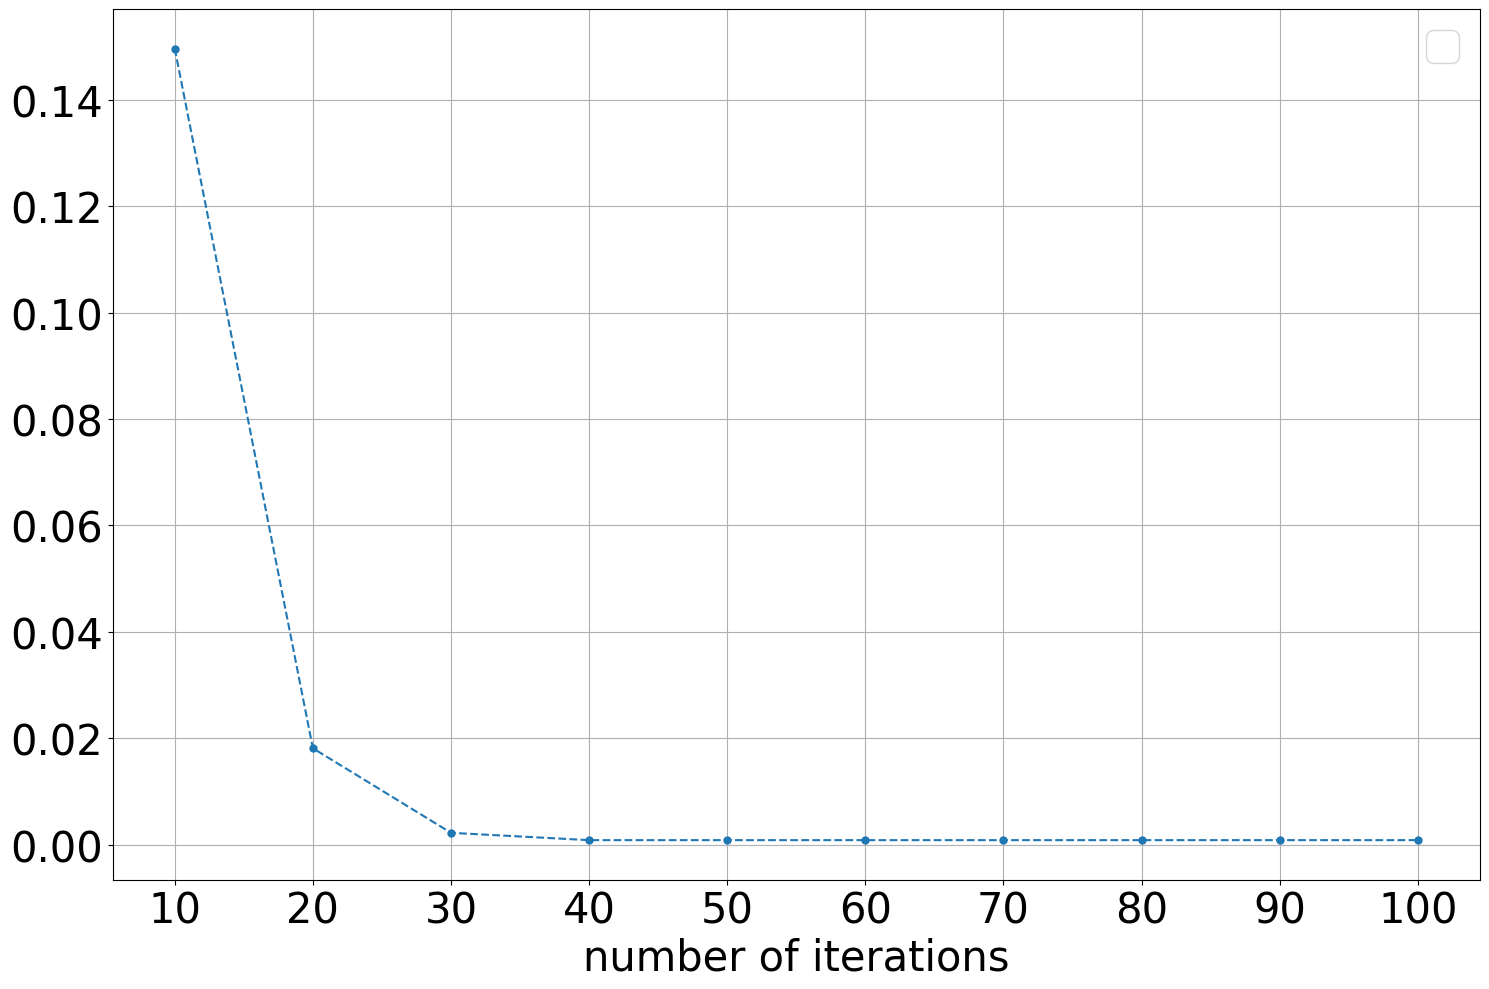

In [152]:
f,ax1 = plt.subplots(1,figsize = (15,10))

gamma_k = 1 / lipschitz_constan(X)

critrion_array_0 = np.array([])
iters = np.linspace(10, 10**2, 10**1)
for iter in tqdm(iters):

  omega, criterion = gradient_descent(X_train, y_train, lmbd=1, omega_0=omega_0, gamma_k=gamma_k , K = iter, eps = 10**(-3))
  critrion_array_0 = np.append(critrion_array_0, criterion)

# ax1.set_xscale('log')
ax1.plot(iters, critrion_array_0, '.--',markersize=10 )

ax1.grid(alpha = 1)
ax1.xaxis.set_major_locator(MaxNLocator(integer=False))
ax1.set_xlabel('number of iterations', fontsize = 30 )
#ax1.set_ylabel('$\frac{\| \nabla f(x^k) \|}{\| \nabla f(x^0) \|}$', fontsize = 30 )

ax1.legend(fontsize = 30)


ax1.tick_params(axis='x', labelsize=30)
ax1.tick_params(axis='y', labelsize=30)

plt.tight_layout()




__c). (10 points)__ Tune a step of the method, make it larger and try to make the convergence faster. Add to the previous plot the convergence of the tuned method. Remember to make conclusions and comment on the results.

We see that convergence increases significantly with increase of step size. It make sence, since then we move faster to optimum. But if step size is too large, we literally run out of optimum

100%|██████████| 10/10 [00:06<00:00,  1.56it/s]


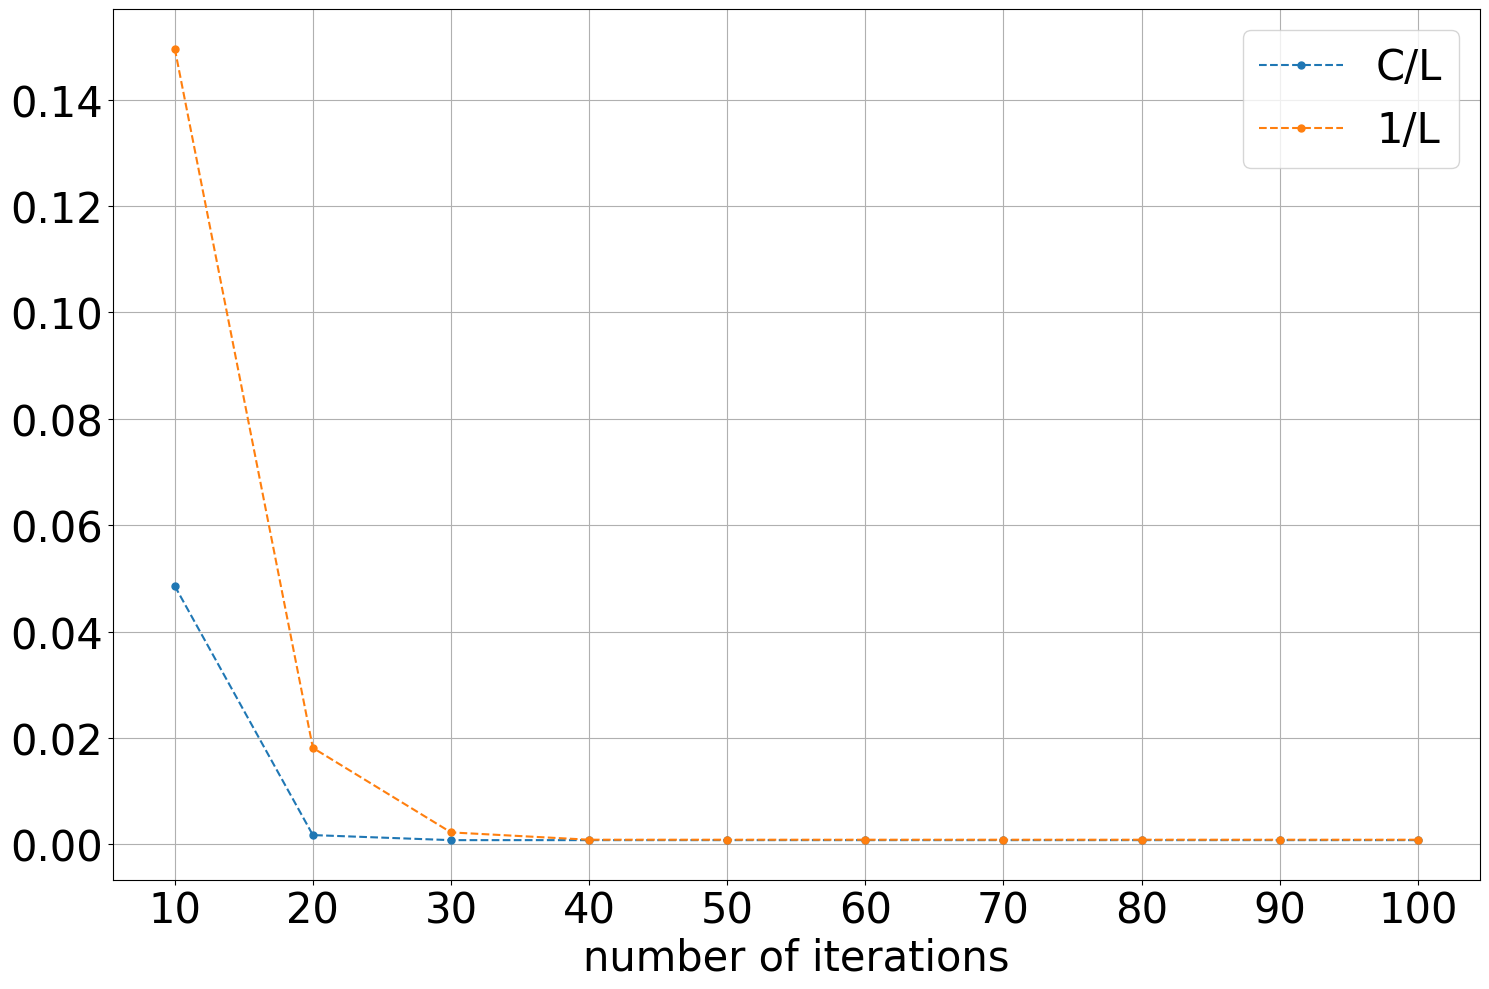

In [153]:
f,ax1 = plt.subplots(1,figsize = (15,10))

gamma_k =  1.5 / lipschitz_constan(X)
critrion_array = np.array([])
iters = np.linspace(10, 10**2, 10**1)
for iter in tqdm(iters):

  omega, criterion = gradient_descent(X_train, y_train, lmbd=1, omega_0=omega_0, gamma_k=gamma_k, K = iter, eps = 10**(-3))
  critrion_array = np.append(critrion_array, criterion)

# ax1.set_xscale('log')
ax1.plot(iters, critrion_array, '.--',markersize=10, label='C/L')
ax1.plot(iters, critrion_array_0, '.--',markersize=10, label='1/L' )


ax1.grid(alpha = 1)
ax1.xaxis.set_major_locator(MaxNLocator(integer=False))
ax1.set_xlabel('number of iterations', fontsize = 30 )
#ax1.set_ylabel('$\frac{\| \nabla f(x^k) \|}{\| \nabla f(x^0) \|}$', fontsize = 30 )

ax1.legend(fontsize = 30)


ax1.tick_params(axis='x', labelsize=30)
ax1.tick_params(axis='y', labelsize=30)

plt.tight_layout()



__Problem 3. (30 points)__ Now let us talk about Newton method and quasi-Newton methods.

__а). (15 points)__ For the regression problem, implement and run Newton method. Does it converge? If not, try running the gradient descent method for several iterations first before using Newton method. Vary the number of gradient descent steps. Plot the value of convergence criterion versus iteration number for the combination of gradient descent and Newton method with different number of gradient descent steps. Make a conclusion.

Combination of this two methods helps to increase performance on test data

In [154]:
def newton_descent(X, y, lmbd, omega_0, K, k , eps):

  L = lipschitz_constan(X)

  grad_f_ = jax.grad(function_jax, argnums=3)

  grad_0 = grad_f_(X, y, lmbd, omega_0)


  omega_0, tmp = gradient_descent(X, y, lmbd, omega_0, 1 / L, k , eps)

  for _ in range(int(K)):

    grad_f = jax.grad(function_jax, argnums=3)
    hessian_f = jax.hessian(function_jax, argnums=3)

    grad = grad_f(X, y, lmbd, omega_0)
    hessian = hessian_f(X, y, lmbd, omega_0)

    omega = omega_0 - 1 / L * jnp.linalg.inv(hessian) @ grad

    if jnp.linalg.norm(grad_f(X, y, lmbd, omega)) / jnp.linalg.norm(grad_0) > eps :
      omega_0 = omega
    else:
      return omega, jnp.linalg.norm(grad_f(X, y, lmbd, omega)) / jnp.linalg.norm(grad_0)


  return omega, jnp.linalg.norm(grad_f(X, y, lmbd, omega)) / jnp.linalg.norm(grad_0)


100%|██████████| 10/10 [00:18<00:00,  1.87s/it]


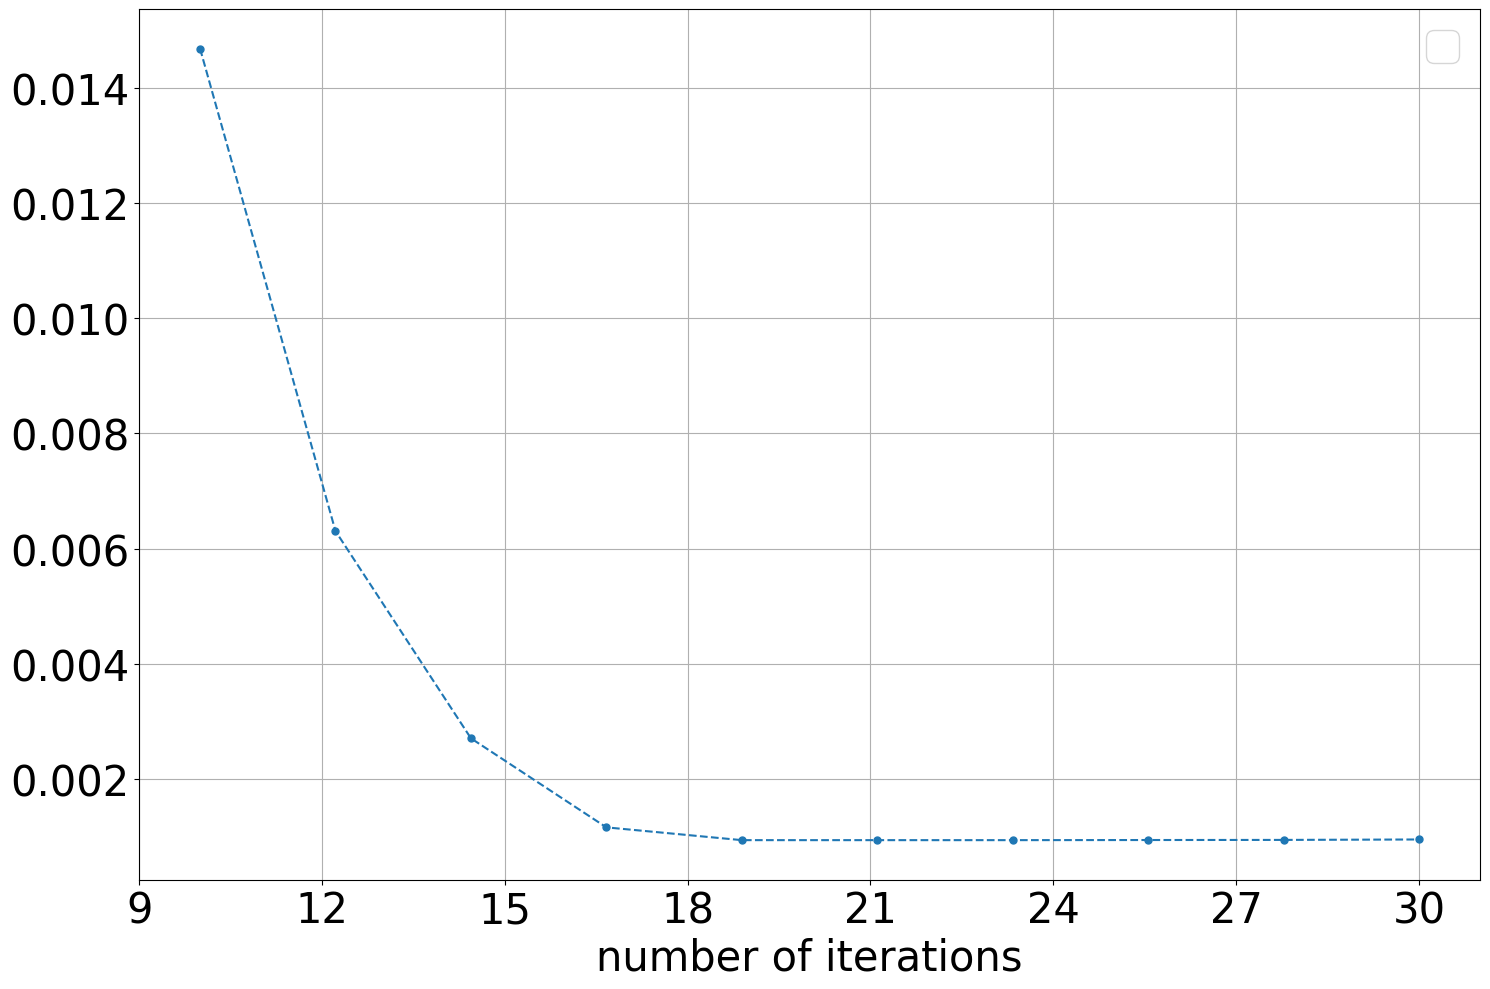

In [155]:

f,ax1 = plt.subplots(1,figsize = (15,10))


critrion_array = np.array([])
iters = np.linspace(10, 30, 10)

for iter in tqdm(iters):


  omega, criterion = newton_descent(X_train, y_train, lmbd=1, omega_0=omega_0, K = iter,k=iter, eps = 10**(-3))
  critrion_array = np.append(critrion_array, criterion)

# ax1.set_xscale('log')
ax1.plot(iters, critrion_array, '.--',markersize=10)


ax1.grid(alpha = 1)
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.set_xlabel('number of iterations', fontsize = 30 )
#ax1.set_ylabel('$\frac{\| \nabla f(x^k) \|}{\| \nabla f(x^0) \|}$', fontsize = 30 )

ax1.legend(fontsize = 30)


ax1.tick_params(axis='x', labelsize=30)
ax1.tick_params(axis='y', labelsize=30)

plt.tight_layout()


__b). (15 points)__ Implement the quasi-Newton method BFGS. Use it to solve the regression problem. Add it to the plot from the previous point about Newton method. Make a conclusion.

As expected, BFGS converges slower then newton method

In [156]:
def BFGS_descent(X, y, lmbd, omega_0, K , eps):

  L = lipschitz_constan(X)

  grad_f = jax.grad(function_jax, argnums=3)
  grad_0 = grad_f(X, y, lmbd, omega_0)

  B = np.eye(omega_0.shape[0], dtype=np.float64)

  for _ in range(int(K)):

    grad = grad_f(X, y, lmbd, omega_0)

    omega = omega_0 - 1 / L * jnp.linalg.inv(B) @ grad

    S = omega - omega_0
    Y = grad_f(X, y, lmbd, omega) - grad_f(X, y, lmbd, omega_0)

    B = B + np.outer(Y, Y) / (Y.T @ S) - np.outer((B @ S), (B @ S)) / (S.T @ B @ S)

    if jnp.linalg.norm(grad_f(X, y, lmbd, omega)) / jnp.linalg.norm(grad_0) > eps :
      omega_0 = omega
    else:
      return omega, jnp.linalg.norm(grad_f(X, y, lmbd, omega)) / jnp.linalg.norm(grad_0)



  return omega, jnp.linalg.norm(grad_f(X, y, lmbd, omega)) / jnp.linalg.norm(grad_0)

100%|██████████| 20/20 [01:33<00:00,  4.69s/it]


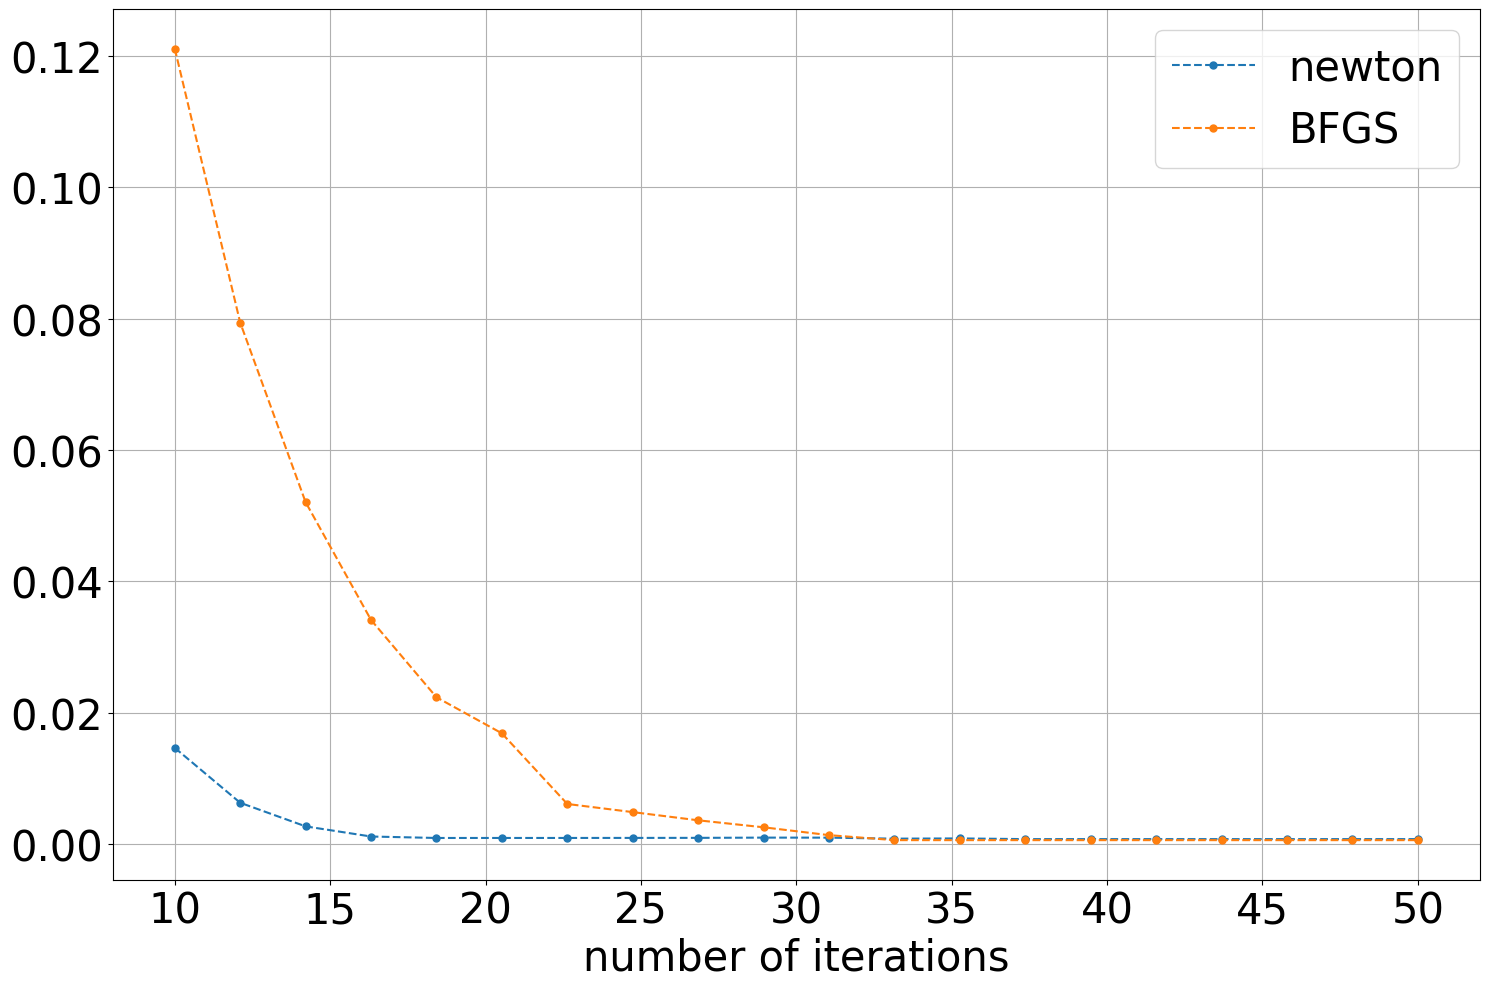

In [157]:

f,ax1 = plt.subplots(1,figsize = (15,10))


critrion_array_newton = np.array([])
critrion_array_BFGS = np.array([])

iters = np.linspace(10, 50, 20)

for iter in tqdm(iters):


  omega, criterion = newton_descent(X_test, y_test, lmbd=1, omega_0=omega_0, K = iter,k=iter, eps = 10**(-3))
  critrion_array_newton = np.append(critrion_array_newton, criterion)

  omega, criterion = BFGS_descent(X_test, y_test, lmbd=1, omega_0=omega_0, K = iter, eps = 10**(-3))
  critrion_array_BFGS = np.append(critrion_array_BFGS, criterion)

# ax1.set_xscale('log')
ax1.plot(iters, critrion_array_newton, '.--',markersize=10, label='newton')
ax1.plot(iters, critrion_array_BFGS, '.--',markersize=10, label='BFGS')


ax1.grid(alpha = 1)
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.set_xlabel('number of iterations', fontsize = 30 )
#ax1.set_ylabel('$\frac{\| \nabla f(x^k) \|}{\| \nabla f(x^0) \|}$', fontsize = 30 )

ax1.legend(fontsize = 30)


ax1.tick_params(axis='x', labelsize=30)
ax1.tick_params(axis='y', labelsize=30)

plt.tight_layout()

__Problem 4. (15 points)__ It remains to combine the results obtained in Problems 1-3. For this purpose, let us remember that the original regression problem is a machine learning problem and that the linear model $g$ can be used to predict the values of labels $y$. How do we use the final model for prediction? After answering the question, make predictions on a test sample $X_{test}$. Compare with the actual $y_{test}$ labels. The number of correctly guessed labels is the accuracy/accuracy of the model. Compare the gradient descent method (with theoretical and tuned steps), Newton method, BFGS. Construct two plots: the value of convergence criterion from running time and the prediction accuracy from running time. Make a conclusion.

Having optimized weights, class prediction for new objects has following form
$$
y = sign(Xw)
$$

## Conclusion:

Newton showes best convergence, then tuned GD and BFGS and standart GD shows same result



Newtom gives best score performance, then GD and BFGS. What is interresting, standart and tuned GD gives exactly the same score. We use only one seed of initial parameters and different methods stuck in different local minimas

In [158]:

critrion_array_descent = np.array([])
critrion_array_descent_tuned = np.array([])
critrion_array_newton = np.array([])
critrion_array_BFGS = np.array([])

score_array_descent_tuned = np.array([])
score_array_descent = np.array([])
score_array_newton = np.array([])
score_array_BFGS = np.array([])


iters = np.linspace(10, 70, 20)




for iter in tqdm(iters):

  omega_descent, criterion = gradient_descent(X_test, y_test, lmbd=1, omega_0=omega_0, gamma_k=1/lipschitz_constan(X), K=iter , eps=10**(-3))
  critrion_array_descent = np.append(critrion_array_descent, criterion)
  score_array_descent = np.append(score_array_descent, np.sum(np.abs(y_test - jnp.sign(X_test @ omega_descent))) / 2 / y_test.shape[0])

  omega_descent_tuned, criterion = gradient_descent(X_test, y_test, lmbd=1, omega_0=omega_0, gamma_k=1.5/lipschitz_constan(X), K=iter , eps=10**(-3))
  critrion_array_descent_tuned = np.append(critrion_array_descent_tuned, criterion)
  score_array_descent_tuned = np.append(score_array_descent_tuned, np.sum(np.abs(y_test - jnp.sign(X_test @ omega_descent))) / 2 / y_test.shape[0])


  omega_newton, criterion = newton_descent(X_test, y_test, lmbd=1, omega_0=omega_0, K = iter,k=iter, eps = 10**(-3))
  critrion_array_newton = np.append(critrion_array_newton, criterion)
  score_array_newton = np.append(score_array_newton, np.sum(np.abs(y_test - jnp.sign(X_test @ omega_newton))) / 2 / y_test.shape[0])


  omega_BFGS, criterion = BFGS_descent(X_test, y_test, lmbd=1, omega_0=omega_0, K = iter, eps = 10**(-3))
  critrion_array_BFGS = np.append(critrion_array_BFGS, criterion)
  score_array_BFGS = np.append(score_array_BFGS, np.sum(np.abs(y_test - jnp.sign(X_test @ omega_BFGS))) / 2 / y_test.shape[0])




100%|██████████| 20/20 [02:01<00:00,  6.07s/it]


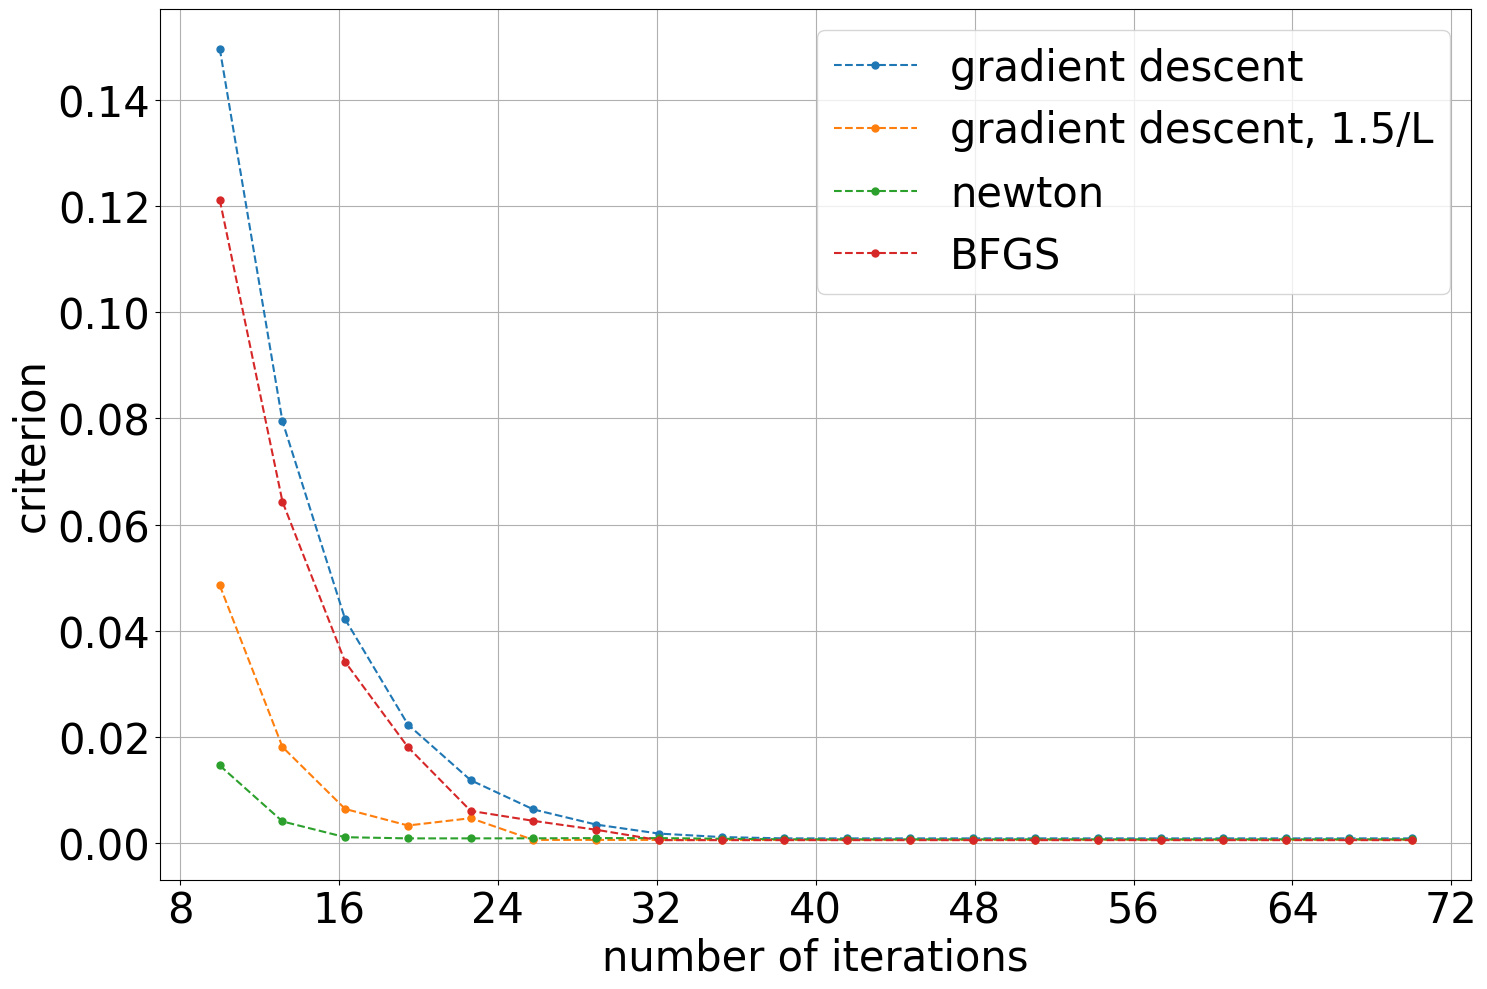

In [159]:
f,ax1 = plt.subplots(1,figsize = (15,10))

# ax1.set_xscale('log')

ax1.plot(iters, critrion_array_descent, '.--',markersize=10, label='gradient descent')
ax1.plot(iters, critrion_array_descent_tuned, '.--',markersize=10, label='gradient descent, 1.5/L')
ax1.plot(iters, critrion_array_newton, '.--',markersize=10, label='newton')
ax1.plot(iters, critrion_array_BFGS, '.--',markersize=10, label='BFGS')


ax1.grid(alpha = 1)
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.set_xlabel('number of iterations', fontsize = 30 )
ax1.set_ylabel('criterion', fontsize = 30 )

ax1.legend(fontsize = 30)


ax1.tick_params(axis='x', labelsize=30)
ax1.tick_params(axis='y', labelsize=30)

plt.tight_layout()

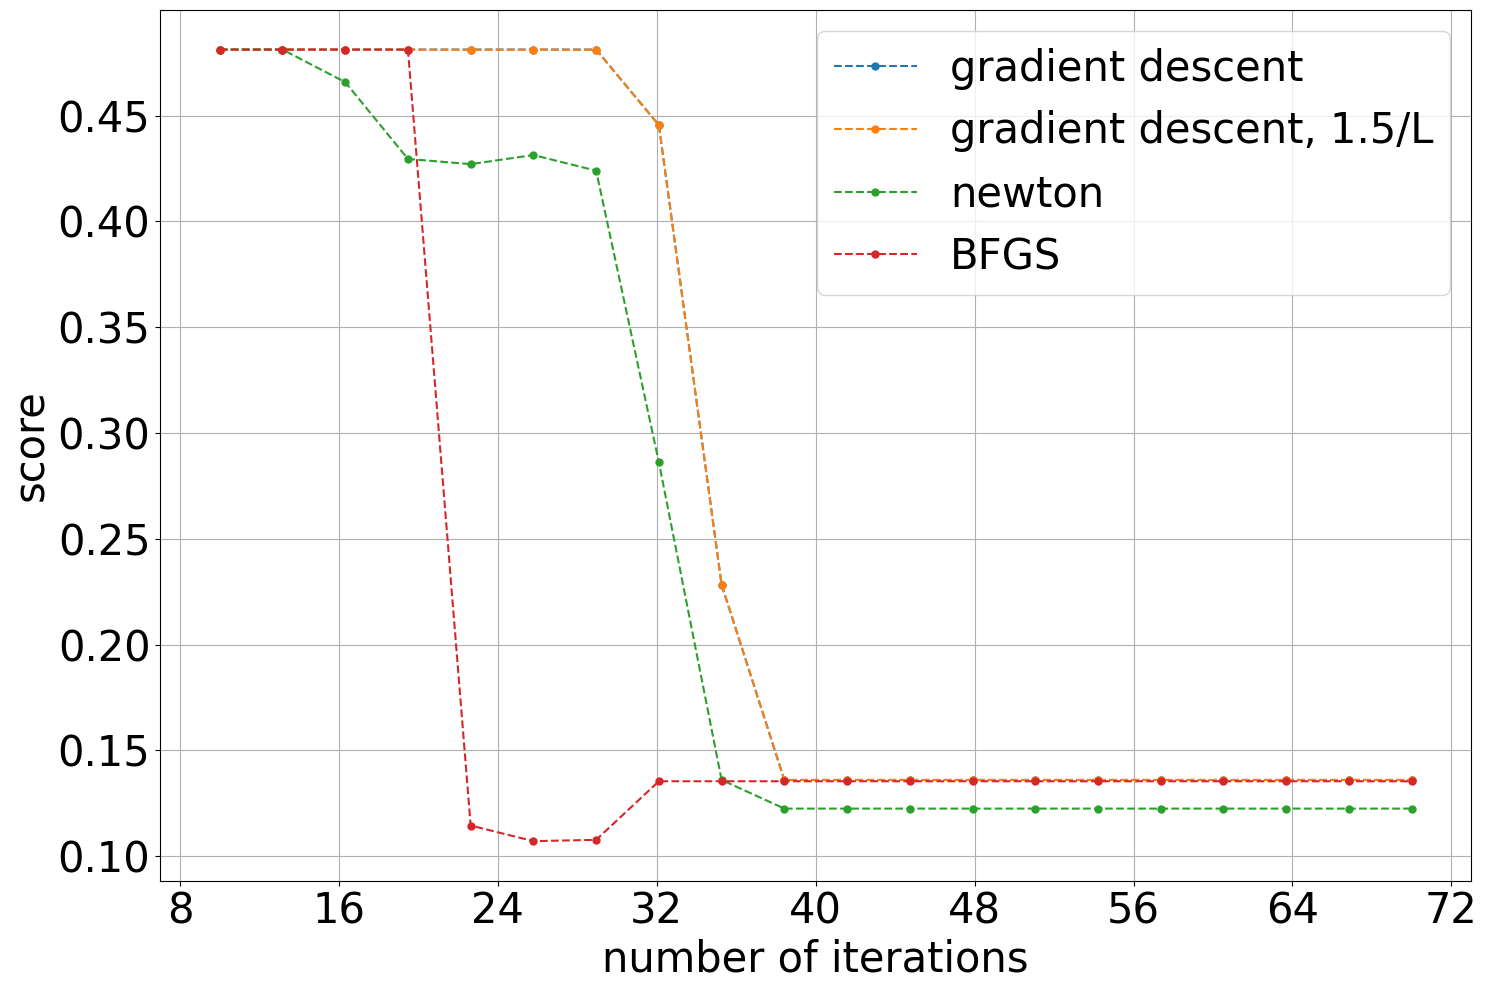

In [160]:
f,ax1 = plt.subplots(1,figsize = (15,10))

# ax1.set_xscale('log')
ax1.plot(iters, score_array_descent, '.--',markersize=10, label='gradient descent')
ax1.plot(iters, score_array_descent_tuned, '.--',markersize=10, label='gradient descent, 1.5/L')
ax1.plot(iters, score_array_newton, '.--',markersize=10, label='newton')
ax1.plot(iters, score_array_BFGS, '.--',markersize=10, label='BFGS')


ax1.grid(alpha = 1)
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.set_xlabel('number of iterations', fontsize = 30 )
ax1.set_ylabel('score', fontsize = 30 )

ax1.legend(fontsize = 30)


ax1.tick_params(axis='x', labelsize=30)
ax1.tick_params(axis='y', labelsize=30)

plt.tight_layout()


In [161]:
score_array_descent - score_array_descent_tuned

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])